In [1]:
import warnings
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import default_rng
import itertools as it
import sys
import progressbar
import time
import random

from joblib import Parallel, delayed
from joblib import Parallel, delayed

from scipy import linalg
from scipy.linalg import LinAlgWarning

import pickle

warnings.filterwarnings(action='error', category=LinAlgWarning, module='sklearn')



In [2]:
def get_far_field(p, n_exc, d_r, epsilon=12.25):
    return np.pi**2/epsilon**2*np.abs(d_r*n_exc*np.sum(p, axis=-1))**2

def get_far_field_angle_resolved(p, v_r, theta, pol="x", norm=1., k=2.*np.pi):
    if pol == "x":
        return norm*np.abs(np.sum( np.exp(-1j*k*v_r*np.sin(theta))*np.cos(theta)**2*p, axis=-1))**2
    else:
        return norm*np.abs(np.sum( np.exp(-1j*k*v_r*np.sin(theta))*p, axis=-1))**2



## Load data and analyze

In [13]:
gamma_0 = 1.
gamma_nr = 0.
n_exc = 10.
rmax = 10.

folder = "store"

try:
    del px, py, v_a, v_D, v_delta, v_r
except:
    dummy = 0
    
filename = "/new_gamma0_{:.2f}_gammanr_{:.2f}_nexc_{:.2f}_rmax_{:.2f}".format(gamma_0, gamma_nr, n_exc, rmax)

with open(folder + filename +'.pkl', 'rb') as handle:
    data = pickle.load(handle)
    
px = data['x']
py = data['y']
p_bare = data['bare']
v_a = data["a"]
v_D = data["D"]
v_delta = data["delta"]
v_r = data["r"]

r_max = np.max(v_r)

del data

In [14]:
# generate plot (delta, theta)
D = 10.
a = .2

N_theta = 100
theta_min = (0/360)*2.*np.pi
theta_max = (90/360)*2.*np.pi


#####################
i_D = np.argmin(np.abs(v_D-D))
i_a = np.argmin(np.abs(v_a-a))

v_theta = np.linspace(theta_min,theta_max,N_theta)

ffx = np.zeros((v_delta.size,v_theta.size))
ffy = np.zeros((v_delta.size,v_theta.size))
ffbx = np.zeros((v_delta.size,v_theta.size))
ffby = np.zeros((v_delta.size,v_theta.size))
for i_delta,delta in enumerate(list(v_delta)):
    for i_theta, theta in enumerate(list(v_theta)):
        ffx[i_delta,i_theta] = get_far_field_angle_resolved(px[i_a,i_D,i_delta], v_r, theta, pol="x")
        ffy[i_delta,i_theta] = get_far_field_angle_resolved(py[i_a,i_D,i_delta], v_r, theta, pol="y")
        
        ffby[i_delta,i_theta] = get_far_field_angle_resolved(p_bare[i_a,i_D,i_delta], v_r, theta, pol="x")
        ffbx[i_delta,i_theta] = get_far_field_angle_resolved(p_bare[i_a,i_D,i_delta], v_r, theta, pol="y")
        
ff = dict()
ff["x"] = ffx
ff["y"] = ffy
ff["bx"] = ffbx
ff["by"] = ffby
ff["sum"] = ffx + ffy



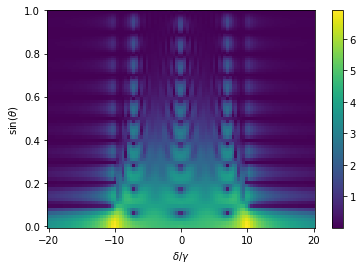

In [15]:
# meshgrid

pol = "bx"
sat = 2000

plt.pcolormesh(v_delta,np.sin(v_theta),np.minimum(sat,np.log(1+1000*ff[pol]/np.max(ff[pol]))).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\sin(\theta)$")
plt.colorbar()

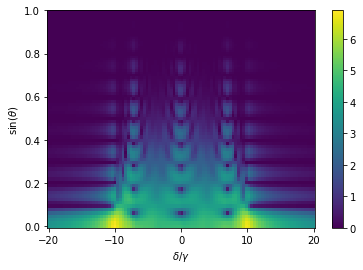

In [16]:
# meshgrid

pol = "x"
sat = 2000

plt.pcolormesh(v_delta,np.sin(v_theta),np.minimum(sat,np.log(1+1000*ff[pol]/np.max(ff[pol]))).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\sin(\theta)$")
plt.colorbar()

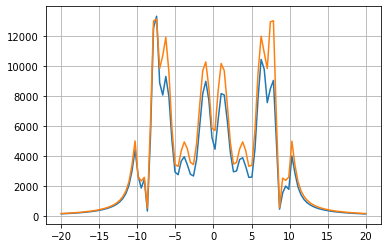

In [17]:
sintheta = 0.25

pol1 = "x"
pol2 = "b" + pol1

i_theta = np.argmin(np.abs(v_theta-np.arcsin(sintheta)) )
plt.plot(v_delta,ff[pol1][:,i_theta])
plt.plot(v_delta,ff[pol2][:,i_theta])
plt.grid(True)

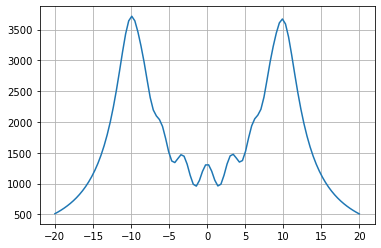

In [20]:
sintheta = 0.15

i_theta = np.argmin(np.abs(v_theta-np.arcsin(sintheta)) )
plt.plot(v_delta,ffx[:,i_theta])
plt.grid(True)

In [41]:
np.arcsin(0.25)*360/2/np.pi

14.477512185929923

(4.0, 6.0)

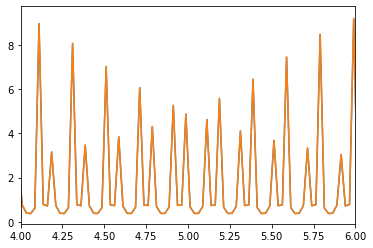

In [42]:
D = 10.
a = 0.2
delta = 3.

x_range = [2/5*r_max,3/5*r_max]
#x_range = None

i_D = np.argmin(np.abs(v_D-D))
i_a = np.argmin(np.abs(v_a-a))
i_delta = np.argmin(np.abs(v_delta-delta))

plt.plot(v_r, np.abs(px[i_a,i_D,i_delta]) ) 
plt.plot(v_r, np.abs(p_bare[i_a,i_D,i_delta]) ) 
plt.xlim(x_range)

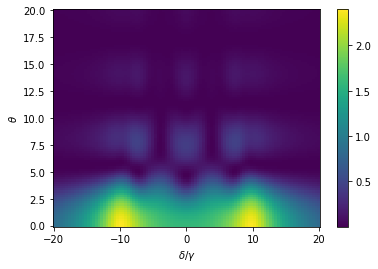

In [142]:
# meshgrid

pol = "x"
sat = 2000

plt.pcolormesh(v_delta,360/(2*np.pi)*v_theta,np.minimum(sat,np.log(1+10*ff[pol]/np.max(ff[pol]))).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\theta$")
plt.colorbar()

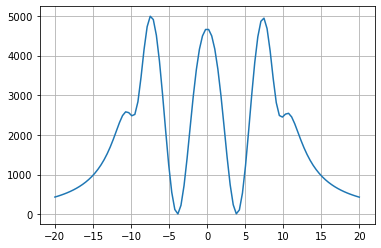

In [144]:
theta = 7.5

i_theta = np.argmin(np.abs(v_theta-theta*2*np.pi/360))
plt.plot(v_delta,ffx[:,i_theta])
plt.grid(True)

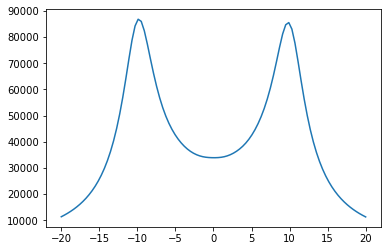

In [54]:
sintheta = 0.

i_theta = np.argmin(np.abs(v_theta-np.arcsin(sintheta*2*np.pi/360)))
plt.plot(v_delta,ffx[:,i_theta])

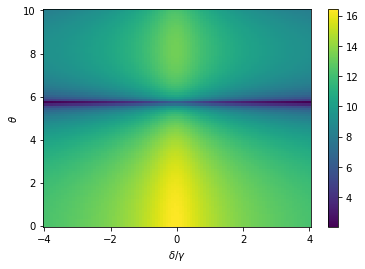

In [46]:
# meshgrid

pol = "x"
sat = 2000

plt.pcolormesh(v_delta,360/(2*np.pi)*v_theta,np.minimum(sat,np.log(1+ff[pol])).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\theta$")
plt.colorbar()

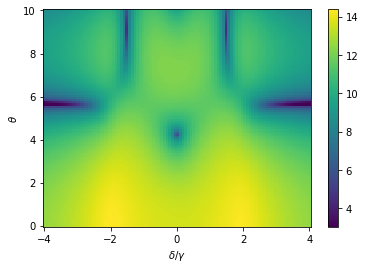

In [38]:
# meshgrid

pol = "x"
sat = 2000

plt.pcolormesh(v_delta,360/(2*np.pi)*v_theta,np.minimum(sat,np.log(1+ff[pol])).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\theta$")
plt.colorbar()

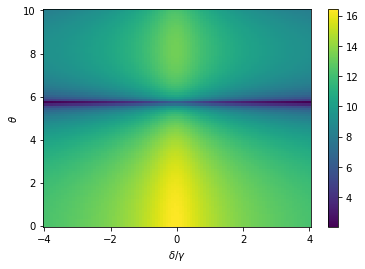

In [40]:
# meshgrid

pol = "x"
sat = 2000

plt.pcolormesh(v_delta,360/(2*np.pi)*v_theta,np.minimum(sat,np.log(1+ff[pol])).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\theta$")
plt.colorbar()

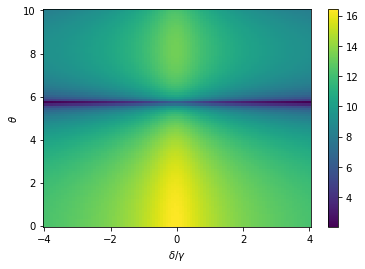

In [42]:
# meshgrid

pol = "x"
sat = 2000

plt.pcolormesh(v_delta,360/(2*np.pi)*v_theta,np.minimum(sat,np.log(1+ff[pol])).T, shading="auto")
plt.xlabel(r"$\delta/\gamma$")
plt.ylabel(r"$\theta$")
plt.colorbar()

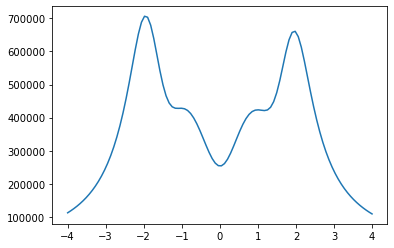

In [41]:
costheta = .05

i_theta = np.argmin(np.abs(v_theta-np.arccos(costheta)))
plt.plot(v_delta,ffx[:,i_theta])

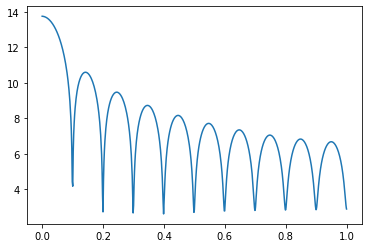

In [52]:
pol = "y"

plt.plot(np.cos(v_theta),np.log(1.+np.mean(ff[pol], axis=0)))

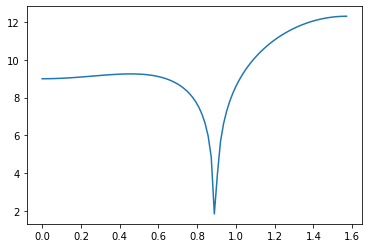

In [100]:
delta = 4.

i_delta = np.argmin(np.abs(v_delta-delta))
plt.plot(v_theta,np.log(1+ffy[i_delta,:]))